In [20]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import svm
%matplotlib inline
sns.set()
sns.set_style('white')

In [21]:
data1 = loadmat('ex7data2.mat')
X = data1['X']
initialCentroids = np.array([[3, 3], [6, 2], [8, 5]])

In [22]:
def distance(data1, data2):
    return np.power(np.sum(np.power(data1 - data2, 2)), 1 / 2)

In [23]:
def findingClosestCentroids (x, centroids):
    Ci = []
    for number1 in range(len(x)):
        distances = []
        for number2 in range(len(centroids)):
            distances.append(distance(x[number1], centroids[number2]))
        Ci.append(np.argmin(distances) + 1)
    return np.array(Ci), np.c_[x, Ci]

In [24]:
def computingCentroidMeans (XCi, k):
    seperateArray = []
    Mu = []
    for number in range(k):
        seperateArray.append(XCi[np.ix_(XCi[:, XCi.shape[1] - 1] == number + 1, np.array([True, True, False]))])
    seperateArray = np.array(seperateArray)
    for number in seperateArray:
        Mu.append(sum(number) / len(number))
    return np.array(Mu)

In [25]:
def plotData(x, centroids, k = 3, XCi = None):
    
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
        
    fig = plt.figure(figsize = (7,5))
    if XCi is not None:
        for number in range(k):
            subx = XCi[np.ix_(XCi[:, XCi.shape[1] - 1] == number + 1, np.array([True, True, False]))]
            plt.plot(subx[:, 0], subx[:, 1], 'o', color = colors[number], alpha=0.75, label='Data Points: Cluster {}'.format(number))
    else:        
        plt.plot(x[:, 0], x[:, 1], 'o', color = 'b', alpha=0.75, label='Data Points: Cluster {}'.format(0))
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title('Plot of X Points', fontsize=16)
    plt.grid(True)
        
    if len(centroids) == 3:
        plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'r', marker = 'x')
    else:
        for centroid in centroids:
            plt.scatter(centroid[:, 0], centroid[:, 1], s = 100, c = 'r', marker = 'x')
            
    if len(centroids.shape) == 3:
        for number in range(len(centroids[0])):
            plt.plot(centroids[:, number, 0], centroids[:, number, 1], 'r--')
    
    leg = plt.legend(loc=4, framealpha=0.5)

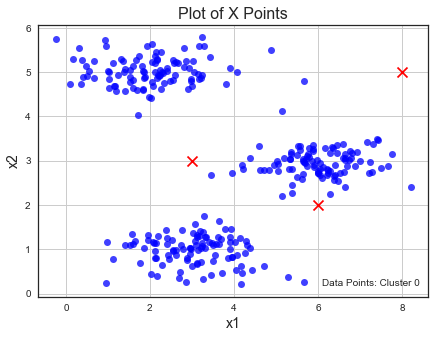

In [26]:
plotData(X, initialCentroids)

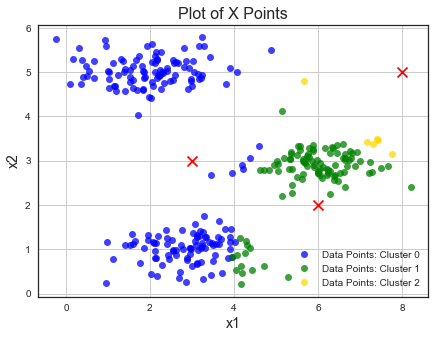

In [27]:
XCi = findingClosestCentroids(X, initialCentroids)[1]
plotData(X, initialCentroids, 3, XCi)

In [28]:
def runningKMeans (x, centroids, k, numberofIters):
    previosCentroids = []
    currentCentroids = centroids
    for number in range(numberofIters):
        previosCentroids.append(currentCentroids)
        XCi = findingClosestCentroids(x, currentCentroids)[1]
        currentCentroids = np.array(computingCentroidMeans (XCi, k))
    return XCi, np.array(previosCentroids)

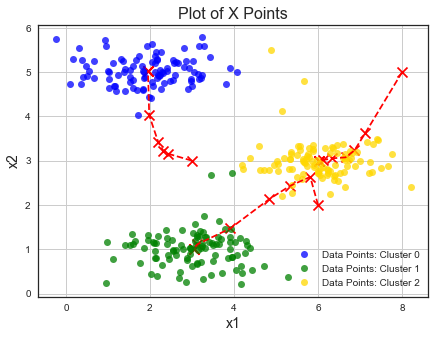

In [29]:
XCi, previosCentroids = runningKMeans(X, initialCentroids, 3, 10)
plotData(X, previosCentroids, 3, XCi)

In [30]:
def chooseRandomCentroid (x, k):
    return x[np.random.randint(0, x.shape[0], k)]

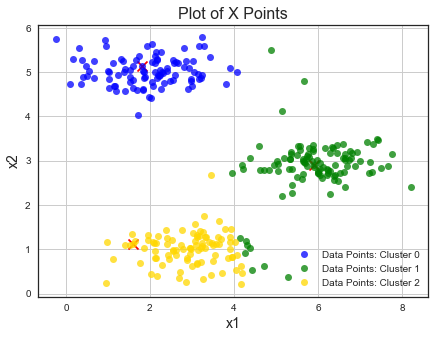

In [31]:
randomCentroids = chooseRandomCentroid(X, 3)
XCi = findingClosestCentroids(X, randomCentroids)[1]
plotData(X, randomCentroids, 3, XCi)

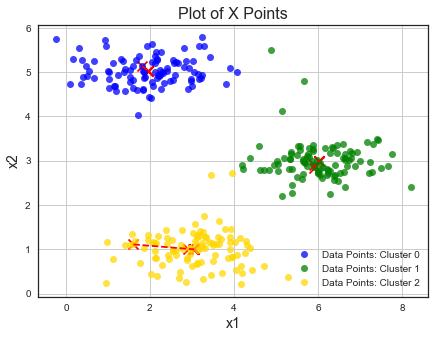

In [32]:
XCi, previosCentroids = runningKMeans(X, randomCentroids, 3, 10)
plotData(X, previosCentroids, 3, XCi)

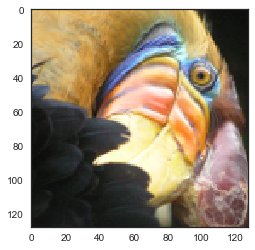

In [33]:
image = plt.imread('bird_small.png')
plt.imshow(image)
image = image.reshape(-1, 3)

In [34]:
def computingCentroidMeans (XCi, k):
    seperateArray = []
    Mu = []
    for number in range(k):
        seperateArray.append(XCi[np.ix_(XCi[:, XCi.shape[1] - 1] == number + 1, np.array([True, True, True]))])
    seperateArray = np.array(seperateArray)
    for number in seperateArray:
        Mu.append(sum(number) / len(number))
    return np.array(Mu)

In [35]:
randomCentroids = chooseRandomCentroid(image, 16)
XCi, previosCentroids = runningKMeans(image, randomCentroids, 16, 10)

In [36]:
idxs = findingClosestCentroids(image, previosCentroids[-1])[0]